In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import glob
import data_loading
import eval
import partitioning


In [3]:
# load sample lobster data
message_paths = glob.glob('data/*message*.csv')
book_paths = glob.glob('data/*orderbook*.csv')

# 

In [462]:
m = data_loading.load_message_df(message_paths[0])
b = data_loading.load_book_df(book_paths[0])

# DATA FORMAT:

# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_cond 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_gen 
# total 156912
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_1_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_1_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_real 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv

In [9]:
m

,time,event_type,order_id,size,price,direction
0,34200.015105074,4,15818974,4,5794000,1
1,34200.05990197,4,15818974,300,5794000,1
2,34200.113246707,5,0,1,5795100,1
3,34200.113246707,5,0,1,5795000,1
4,34200.113246707,5,0,1,5794900,1
...,...,...,...,...,...,...
147911,57599.544131783,1,287157290,300,5655600,-1
147912,57599.544132627,1,287157291,200,5655600,-1
147913,57599.544133264,1,287157292,300,5655600,-1
147914,57599.582154048,3,287027555,100,5649700,1


In [72]:
eval.time_to_first_fill(m).mean()

17.77700116925748

In [71]:
eval.time_to_cancel(m).mean()

7.965471268527362

In [80]:
eval.l1_volume(m, b)

,ask_vol,bid_vol,time_weight
0,100,496,NaN
1,100,196,0.000001914408993084087627622518347
2,100,196,0.000002279703581393350855837805738
3,100,196,0
4,100,196,0
...,...,...,...
147911,42,200,8.290649081095105334056372105E-11
147912,42,200,3.606859703321788093785349514E-11
147913,42,200,2.722238899308032009172118057E-11
147914,42,200,0.000001624829783155234450326830761


In [96]:
eval.total_volume(m, b, 1)

,ask_vol,bid_vol,time_weight
0,100,5802300,NaN
1,100,5802300,0.000001914408993084087627622518347
2,100,5802300,0.000002279703581393350855837805738
3,100,5802300,0
4,100,5802300,0
...,...,...,...
147911,42,5652200,8.290649081095105334056372105E-11
147912,42,5652200,3.606859703321788093785349514E-11
147913,42,5652200,2.722238899308032009172118057E-11
147914,42,5652200,0.000001624829783155234450326830761


In [115]:
eval.limit_order_depth(m, b)

(10        2450.0
 12        3050.0
 14        3350.0
 16        3550.0
 18        3550.0
            ...  
 147909    3900.0
 147910    3900.0
 147911    3900.0
 147912    3900.0
 147913    3900.0
 Length: 37136, dtype: float64,
 7         4150.0
 8         6950.0
 9         8150.0
 11        6450.0
 13        6550.0
            ...  
 147889    3950.0
 147891    2600.0
 147892    3700.0
 147894    3200.0
 147896    4000.0
 Length: 34122, dtype: float64)

In [116]:
eval.cancellation_depth(m, b)

(45         9250.0
 47        11650.0
 76         3050.0
 77         2750.0
 81         3050.0
            ...   
 147876     2850.0
 147897     3300.0
 147898     2200.0
 147904     3900.0
 147915     3300.0
 Length: 33222, dtype: float64,
 44        25650.0
 46        23250.0
 69         7550.0
 70        14550.0
 71         9550.0
            ...   
 147883     3800.0
 147887     4000.0
 147893     2600.0
 147903     1100.0
 147914     2000.0
 Length: 31724, dtype: float64)

In [125]:
eval._order_levels(m, b, (1,2,3))

(3          1
 39         1
 42         1
 43         1
 47         1
           ..
 136005    10
 136019    10
 136025    10
 136113    10
 136217    10
 Length: 49808, dtype: int64,
 0          1
 40         1
 44         1
 64         1
 65         1
           ..
 135877    10
 136010    10
 136030    10
 136053    10
 136194    10
 Length: 45838, dtype: int64)

In [127]:
eval.cancel_order_levels(m, b)

(8         1
 10        1
 12        1
 47        1
 52        1
          ..
 63101    10
 63371    10
 63406    10
 63420    10
 64446    10
 Length: 12672, dtype: int64,
 73        1
 77        1
 108       1
 124       1
 352       1
          ..
 63942    10
 64079    10
 64143    10
 64264    10
 64560    10
 Length: 11716, dtype: int64)

In [128]:
eval.spread(b)

0         8300
1         8300
2         8300
3         8300
4         8300
          ... 
147911    1000
147912    1000
147913    1000
147914    1000
147915    1000
Length: 147916, dtype: int64

In [188]:
ret = eval.mid_returns(m, b, '1min')
ret

time
0 days 09:31:00         NaN
0 days 09:32:00    0.000701
0 days 09:33:00   -0.001393
0 days 09:34:00    0.000329
0 days 09:35:00    0.000251
                     ...   
0 days 15:56:00    0.000390
0 days 15:57:00    0.000425
0 days 15:58:00   -0.000354
0 days 15:59:00    0.001275
0 days 16:00:00    0.000416
Length: 390, dtype: float64

In [189]:
eval.time_to_first_fill(m)

order_id
858821       12.002251
2175511      12.002251
2176461      12.002898
4496151      11.939107
4773351      11.969646
               ...    
287076073     0.102907
287081956     0.000316
287081969     0.000234
287091827     0.275303
287107097     0.114062
Length: 5480, dtype: float64

In [174]:
eval.autocorr(ret)

array([-0.13855764])

In [182]:
eval.autocorr(ret**2, 10, alpha=None)

array([ 1.00000000e+00,  3.97760808e-01,  1.46716661e-01,  1.21313544e-01,
        3.83928983e-02, -1.50425941e-02,  6.71807872e-02,  1.02656084e-01,
        6.61179836e-02,  3.98363877e-04, -2.46290823e-02])

In [183]:
eval.l1_volume(m, b)

,ask_vol,bid_vol,time_weight
0,100,496,NaN
1,100,196,0.000001914408993084087627622518347
2,100,196,0.000002279703581393350855837805738
3,100,196,0
4,100,196,0
...,...,...,...
147911,42,200,8.290649081095105334056372105E-11
147912,42,200,3.606859703321788093785349514E-11
147913,42,200,2.722238899308032009172118057E-11
147914,42,200,0.000001624829783155234450326830761


In [194]:
eval.total_volume(m, b, 2)

,ask_vol,bid_vol,time_weight
time,,,
0 days 09:30:00.015105074,596,11596300,NaN
0 days 09:30:00.059901970,296,11596300,0.000001914408993084087627622518347
0 days 09:30:00.113246707,296,11596300,0.000002279703581393350855837805738
0 days 09:30:00.113246707,296,11596300,0
0 days 09:30:00.113246707,296,11596300,0
...,...,...,...
0 days 15:59:59.544131783,242,11303400,8.290649081095105334056372105E-11
0 days 15:59:59.544132627,242,11303400,3.606859703321788093785349514E-11
0 days 15:59:59.544133264,242,11303400,2.722238899308032009172118057E-11


In [574]:
eval.limit_order_depth(m_real, b_real)

(time
 2012-06-21 09:30:00.202322801    2450.0
 2012-06-21 09:30:00.202322801    3050.0
 2012-06-21 09:30:00.202322801    3350.0
 2012-06-21 09:30:00.202322801    3550.0
 2012-06-21 09:30:00.202322801    3550.0
                                   ...  
 2012-06-21 15:59:59.544126313    3900.0
 2012-06-21 15:59:59.544129843    3900.0
 2012-06-21 15:59:59.544131783    3900.0
 2012-06-21 15:59:59.544132627    3900.0
 2012-06-21 15:59:59.544133264    3900.0
 Length: 37136, dtype: float64,
 time
 2012-06-21 09:30:00.154178213    4150.0
 2012-06-21 09:30:00.173594288    6950.0
 2012-06-21 09:30:00.202322801    8150.0
 2012-06-21 09:30:00.202322801    6450.0
 2012-06-21 09:30:00.202322801    6550.0
                                   ...  
 2012-06-21 15:59:58.844529892    3950.0
 2012-06-21 15:59:58.958997603    2600.0
 2012-06-21 15:59:59.009636180    3700.0
 2012-06-21 15:59:59.122827419    3200.0
 2012-06-21 15:59:59.146213451    4000.0
 Length: 34122, dtype: float64)

In [580]:
# DEPRECATED
# eval.compute_metrics(loader)

,spread,mid_returns_1min,ask_vol,bid_vol,time_weight,ask_vol_10,bid_vol_10,time_weight,ask_limit_depth,bid_limit_depth,ask_cancel_depth,bid_cancel_depth,ask_limit_level,bid_limit_level,ask_cancel_level,bid_cancel_level
time,,,,,,,,,,,,,,,,
2012-06-21 09:35:00,8376.626367,-0.000121,241.099021,190.697179,0.000007,1498.368451,5.782912e+07,0.000007,5917.887029,6669.811321,6383.293269,6753.533569,2.035565,2.333333,2.160839,2.637037
2012-06-21 09:40:00,5430.894495,-0.000610,159.560780,134.629817,0.000003,1240.393349,5.767007e+07,0.000003,6813.548387,3269.740475,7475.000000,3095.104108,3.077419,1.569851,3.455939,1.959437
2012-06-21 09:45:00,5097.472119,0.000010,101.460967,103.371747,0.000010,895.565056,5.758533e+07,0.000010,5591.634981,3803.703704,5707.287449,3898.204420,3.965779,2.751323,4.217573,3.032432
2012-06-21 09:50:00,4264.502470,0.000328,132.516584,144.983063,0.000009,1383.552576,5.765170e+07,0.000009,5028.459821,4146.800000,4946.596244,4200.896861,3.339286,3.388000,3.305361,3.590909
2012-06-21 09:55:00,3642.405063,-0.000142,133.750730,104.103213,0.000006,852.582278,5.764077e+07,0.000006,3340.394089,2966.084788,3324.000000,2974.181360,2.878489,3.049875,3.300172,3.650386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-21 15:45:00,2284.818805,-0.000117,177.146915,200.842311,0.000006,1150.606268,5.649014e+07,0.000006,2060.957447,2310.307018,2381.923077,2404.973822,3.380851,3.789474,4.398458,4.333333
2012-06-21 15:50:00,2314.896266,-0.000110,126.977593,265.901660,0.000005,1337.497510,5.646090e+07,0.000005,2150.838415,1761.864407,2495.808967,2041.184971,3.042683,2.803874,3.661538,3.661765
2012-06-21 15:55:00,1574.562018,-0.000285,224.134198,154.881570,0.000005,1303.623686,5.643338e+07,0.000005,1360.918675,1492.100840,1739.768340,1702.589641,2.697289,3.292437,3.778420,3.908730


In [119]:
loader[0]

In [120]:
s = loader[0]
m_real, b_real, m_gen, b_gen = s.m_real, s.b_real, s.m_gen, s.b_gen

In [396]:
for i in loader:
    print(i)

(                                time  event_type   order_id  size    price  \
0      2012-06-21 09:30:00.015105074           4   15818974     4  5794000   
1      2012-06-21 09:30:00.005990197           4   15818974   300  5794000   
2      2012-06-21 09:30:00.113246707           5          0     1  5795100   
3      2012-06-21 09:30:00.113246707           5          0     1  5795000   
4      2012-06-21 09:30:00.113246707           5          0     1  5794900   
...                              ...         ...        ...   ...      ...   
147911 2012-06-21 15:59:59.544131783           1  287157290   300  5655600   
147912 2012-06-21 15:59:59.544132627           1  287157291   200  5655600   
147913 2012-06-21 15:59:59.544133264           1  287157292   300  5655600   
147914 2012-06-21 15:59:59.582154048           3  287027555   100  5649700   
147915 2012-06-21 15:59:59.871751084           3  287151822   100  5655000   

        direction  
0               1  
1               1  
2 

In [121]:
ask_lvls, bid_lvls = eval.limit_order_levels(m_real, b_real)

In [122]:
ask_lvls

time
2012-06-21 09:30:00.202322801    1
2012-06-21 09:30:00.202322801    2
2012-06-21 09:30:00.202322801    3
2012-06-21 09:30:00.202322801    4
2012-06-21 09:30:00.202322801    4
                                ..
2012-06-21 15:59:59.544126313    3
2012-06-21 15:59:59.544129843    3
2012-06-21 15:59:59.544131783    3
2012-06-21 15:59:59.544132627    3
2012-06-21 15:59:59.544133264    3
Name: ask_limit_level, Length: 37136, dtype: int64

In [123]:
m_real

,time,event_type,order_id,size,price,direction
0,2012-06-21 09:30:00.015105074,4,15818974,4,5794000,1
1,2012-06-21 09:30:00.059901970,4,15818974,300,5794000,1
2,2012-06-21 09:30:00.113246707,5,0,1,5795100,1
3,2012-06-21 09:30:00.113246707,5,0,1,5795000,1
4,2012-06-21 09:30:00.113246707,5,0,1,5794900,1
...,...,...,...,...,...,...
147911,2012-06-21 15:59:59.544131783,1,287157290,300,5655600,-1
147912,2012-06-21 15:59:59.544132627,1,287157291,200,5655600,-1
147913,2012-06-21 15:59:59.544133264,1,287157292,300,5655600,-1
147914,2012-06-21 15:59:59.582154048,3,287027555,100,5649700,1


In [124]:
b_real

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,5802300,100,5794000,496,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
1,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
2,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
3,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
4,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147911,5652200,42,5651200,200,5655000,200,5651100,100,5655600,2200,...,5649400,100,5657000,1800,5649200,300,5657500,100,5649100,100
147912,5652200,42,5651200,200,5655000,200,5651100,100,5655600,2400,...,5649400,100,5657000,1800,5649200,300,5657500,100,5649100,100
147913,5652200,42,5651200,200,5655000,200,5651100,100,5655600,2700,...,5649400,100,5657000,1800,5649200,300,5657500,100,5649100,100
147914,5652200,42,5651200,200,5655000,200,5651100,100,5655600,2700,...,5649400,100,5657000,1800,5649200,300,5657500,100,5649100,100


In [125]:
eval.mid_returns(m_real, b_real)

time
2012-06-21 09:31:00         NaN
2012-06-21 09:32:00    0.000701
2012-06-21 09:33:00   -0.001393
2012-06-21 09:34:00    0.000329
2012-06-21 09:35:00    0.000251
                         ...   
2012-06-21 15:56:00    0.000390
2012-06-21 15:57:00    0.000425
2012-06-21 15:58:00   -0.000354
2012-06-21 15:59:00    0.001275
2012-06-21 16:00:00    0.000416
Freq: min, Name: mid_returns_1min, Length: 390, dtype: float64

In [126]:
m_real.iloc[1163]

time          2012-06-21 09:31:38.384531913
event_type                                1
order_id                           19519131
size                                    100
price                               5809400
direction                                -1
Name: 1163, dtype: object

In [127]:
b_real.iloc[1163]

0     5795900
1         500
2     5775600
3         200
4     5798900
5          25
6     5775500
7         100
8     5799300
9           2
10    5775400
11        100
12    5799500
13         50
14    5775000
15        400
16    5799800
17          5
18    5773000
19        100
20    5800000
21       2937
22    5770000
23          7
24    5800100
25         10
26    5767500
27        100
28    5801000
29         10
30    5766000
31        100
32    5805000
33        100
34    5765000
35          5
36    5809400
37        100
38    5762500
39          1
Name: 1163, dtype: int64

In [128]:
eval.autocorr(eval.mid_returns(m_real, b_real, '1min'), 4)
# eval.mid_returns(m_real, b_real, '5min')

array([ 1.        , -0.13855764, -0.02199417,  0.00926521,  0.00570809])

In [134]:
eval._order_levels(m_real, b_real, (2,3))

(time
 2012-06-21 09:30:00.205119161     8
 2012-06-21 09:30:00.205183697    10
 2012-06-21 09:30:03.650345438     1
 2012-06-21 09:30:03.650507021     1
 2012-06-21 09:30:04.414627059     1
                                  ..
 2012-06-21 15:59:58.304148694     6
 2012-06-21 15:59:59.148979716     6
 2012-06-21 15:59:59.320522524     1
 2012-06-21 15:59:59.489629981     3
 2012-06-21 15:59:59.871751084     2
 Length: 33237, dtype: int64,
 time
 2012-06-21 09:30:00.205075239    10
 2012-06-21 09:30:00.205158699     9
 2012-06-21 09:30:02.190134797     4
 2012-06-21 09:30:02.190251279     6
 2012-06-21 09:30:02.203099603     4
                                  ..
 2012-06-21 15:59:58.401139334     5
 2012-06-21 15:59:58.836501474     7
 2012-06-21 15:59:59.014127805     4
 2012-06-21 15:59:59.458113092     4
 2012-06-21 15:59:59.582154048     6
 Length: 31743, dtype: int64)

In [135]:
cnl_lvl_ask, cnl_lvl_bid = eval.cancel_order_levels(m_real, b_real)

In [136]:
eval.mean_per_interval(cnl_lvl_ask, "5min")

time
2012-06-21 09:35:00    2.160839
2012-06-21 09:40:00    3.455939
2012-06-21 09:45:00    4.217573
2012-06-21 09:50:00    3.305361
2012-06-21 09:55:00    3.300172
                         ...   
2012-06-21 15:40:00    4.931330
2012-06-21 15:45:00    4.398458
2012-06-21 15:50:00    3.661538
2012-06-21 15:55:00    3.778420
2012-06-21 16:00:00    3.426070
Freq: 5min, Name: ask_cancel_level, Length: 78, dtype: float64

## Library Use Cases

In [137]:
from data_loading import Simple_Loader, Lobster_Sequence, Lazy_Tuple

In [139]:
loader = data_loading.Simple_Loader('data_test_real', 'data_test_gen', 'data_test_cond')
s = loader[0]
# s.materialize()

In [140]:
s.m_real

,time,event_type,order_id,size,price,direction
0,2012-06-21 09:30:00.015105074,4,15818974,4,5794000,1
1,2012-06-21 09:30:00.059901970,4,15818974,300,5794000,1
2,2012-06-21 09:30:00.113246707,5,0,1,5795100,1
3,2012-06-21 09:30:00.113246707,5,0,1,5795000,1
4,2012-06-21 09:30:00.113246707,5,0,1,5794900,1
...,...,...,...,...,...,...
147911,2012-06-21 15:59:59.544131783,1,287157290,300,5655600,-1
147912,2012-06-21 15:59:59.544132627,1,287157291,200,5655600,-1
147913,2012-06-21 15:59:59.544133264,1,287157292,300,5655600,-1
147914,2012-06-21 15:59:59.582154048,3,287027555,100,5649700,1


In [141]:
partitioning.score_real(loader, lambda x, y: 1)

[1]

In [142]:
scores = partitioning.score_real(
    tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader),
    lambda m, b: m.time.diff().mean()
)
scores

[(Timedelta('0 days 00:00:00.098292210'),
  Timedelta('0 days 00:00:00.217133571'),
  Timedelta('0 days 00:00:00.158343273'),
  Timedelta('0 days 00:00:00.090068273'),
  Timedelta('0 days 00:00:00.125035999'),
  Timedelta('0 days 00:00:00.138976549'),
  Timedelta('0 days 00:00:00.123208587'),
  Timedelta('0 days 00:00:00.112410261'),
  Timedelta('0 days 00:00:00.156428270'),
  Timedelta('0 days 00:00:00.163456348'),
  Timedelta('0 days 00:00:00.113367037'),
  Timedelta('0 days 00:00:00.203282383'),
  Timedelta('0 days 00:00:00.295049385'),
  Timedelta('0 days 00:00:00.162072288'),
  Timedelta('0 days 00:00:00.199465790'),
  Timedelta('0 days 00:00:00.204993594'),
  Timedelta('0 days 00:00:00.246893592'),
  Timedelta('0 days 00:00:00.160483283'),
  Timedelta('0 days 00:00:00.182061350'),
  Timedelta('0 days 00:00:00.169065219'),
  Timedelta('0 days 00:00:00.297406124'),
  Timedelta('0 days 00:00:00.273141397'),
  Timedelta('0 days 00:00:00.217005387'),
  Timedelta('0 days 00:00:00.18315

In [143]:
scores = partitioning.score_cond(
    loader, 
    lambda m, b: m.time.diff().mean()
)

In [144]:
scores

array([Timedelta('0 days 00:00:00.158197996')], dtype=object)

In [147]:
subseq = partitioning.get_subseqs(s, subseq_len=1000)

In [148]:
len(subseq.m_real)

148

In [149]:
s.m_gen[0]

,time,event_type,order_id,size,price,direction
0,2012-06-21 09:30:00.015105074,4,15818974,4,5794000,1
1,2012-06-21 09:30:00.059901970,4,15818974,300,5794000,1
2,2012-06-21 09:30:00.113246707,5,0,1,5795100,1
3,2012-06-21 09:30:00.113246707,5,0,1,5795000,1
4,2012-06-21 09:30:00.113246707,5,0,1,5794900,1
...,...,...,...,...,...,...
147911,2012-06-21 15:59:59.544131783,1,287157290,300,5655600,-1
147912,2012-06-21 15:59:59.544132627,1,287157291,200,5655600,-1
147913,2012-06-21 15:59:59.544133264,1,287157292,300,5655600,-1
147914,2012-06-21 15:59:59.582154048,3,287027555,100,5649700,1


In [151]:
subseq = partitioning.get_subseqs(loader[0], time_interval='5min')

In [153]:
# Example of how grouping works

partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6],
    n_bins=4
)

(array([3, 3, 3, 3, 2, 4, 1]), [2, 3, 3, 3, 2, 4, 1, 0, 0, 0, 0, 0, 2])

In [154]:
# ..using subsequences

partitioning.group_by_score(
    scores_real=[[9, 10], [9.5, 9], [8, 11, 5.5]],
    scores_gen=[[[8, 10, 9.5], [9, 8, 11]], [[5.5, 1, 1], [1, 2, 3, 6]]],
    quantiles=[0.2, 0.5, 0.8]
)

([array([2, 3]), array([2, 2]), array([2, 4, 1])],
 [array([2, 3, 2]), array([2, 2, 4]), array([1, 0, 0]), array([0, 0, 1, 1])])

In [155]:
loader

In [156]:
import metrics
import plotting

In [157]:
# unconditional comparison of distributions (of 10 min intervals)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# compare distributions of scores
metrics.wasserstein(scores_real, scores_gen)

# print(scores_real)
# print(scores_gen)

0.0

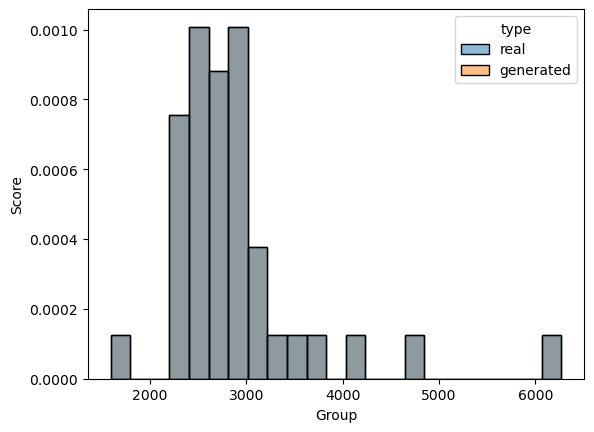

In [158]:
plotting.hist(scores_real, scores_gen)

In [159]:
groups[0]

array([[4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 0, 1, 1, 0, 0,
        0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0]])

In [160]:
# comparison conditional on time of day (which subsequence part)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# enumerate groups for each subseq for each real and gen. sequence
groups_real, groups_gen = partitioning.group_by_subseq(subseqs)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

score_df

,score,group,type
0,6270.116451,0,real
1,4670.130340,1,real
2,3686.223278,2,real
3,4232.341001,3,real
4,3300.939653,4,real
...,...,...,...
112,2373.943818,34,generated
113,2494.810886,35,generated
114,2278.083548,36,generated
115,2301.100629,37,generated


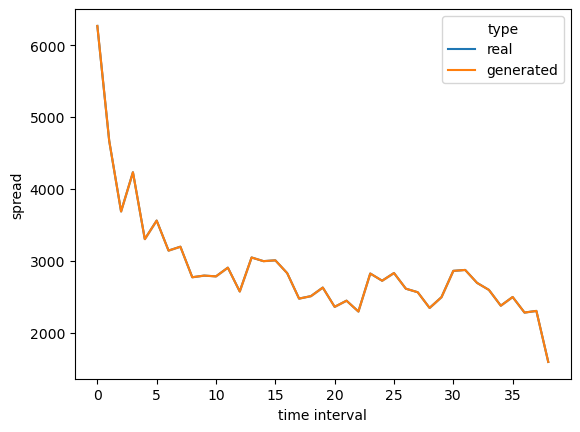

In [161]:
plotting.line(score_df, '', 'time interval', 'spread')

In [162]:
# calculate scores of entire real and generated data (here by the spread),
# and group each subsequence into a bin based on the score
# for each of these bins, calculate the distribution of a statistic of interest (e.g. autocorrelation of mid returns)

scoring_fn = lambda m, b: eval.spread(m, b).mean()
scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)
groups_real, groups_gen = partitioning.group_by_score(
    scores_real, scores_gen,
    # n_bins=5,
    quantiles=[0.25, 0.5, 0.75],
)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

eval_fn = lambda m, b: eval.autocorr(eval.mid_returns(m, b, interval='1min'), 1)[1]
eval_real, eval_gen = partitioning.score_real_gen(subseqs, eval_fn)
eval_df = partitioning.get_score_table(eval_real, eval_gen, groups_real, groups_gen)

eval_df

,score,group,type
0,-0.452006,4,real
1,0.242729,3,real
2,-0.241715,3,real
3,0.178562,3,real
4,-0.353700,3,real
...,...,...,...
112,0.016607,0,generated
113,-0.476628,1,generated
114,0.272829,0,generated
115,-0.085587,0,generated


In [163]:
# 1-minute return autocorrelation by spread quartile
eval_df.groupby(['type', 'group']).score.mean()

type       group
generated  0       -0.082850
           1       -0.138601
           2       -0.189599
           3       -0.065510
           4       -0.452006
real       0       -0.082850
           1       -0.138601
           2       -0.189599
           3       -0.065510
           4       -0.452006
Name: score, dtype: float64

In [164]:
# split data into subsequences (10min each),
# calculate scores of real and generated data (here by the spread),
# and group each subsequence into a bin based on the score

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

partitioning.group_by_score(
    scores_real, scores_gen,
    n_bins=5
)

(array([[5, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
         0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]]),
 [array([[5, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
          0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [5, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
          0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]])])

In [165]:
partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[(8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6)],
    n_bins=5
)

(array([4, 4, 4, 4, 3, 5, 2]),
 [array([3, 4, 4, 4, 3, 5, 2, 0, 0, 0, 0, 1, 2])])

In [166]:
# example use of scoring for real data
print(
    partitioning.score_real(loader, lambda m, b: eval.spread(m, b).mean())
)
# example use of scoring for generated data
print(
    partitioning.score_gen(loader, lambda m, b: eval.spread(m, b).mean())
)

[2962.40907001271]
[(2962.40907001271, 2962.40907001271)]


In [167]:
# TOOD: use partitioning.group_by_score to get groups and then compare relevant metrics for each group
#      solve this for conditioning on cond. data

In [168]:
# condition only on input data
scores = partitioning.score_cond(
    loader,
    lambda m, b: eval.spread(m, b).mean()
)
print(scores)

# --> only single groups (combined scores using input sequences) relevant here
groups, _ = partitioning.group_by_score(
    scores,
    n_bins=5
)
groups

[2962.40907001]


array([5])

In [169]:
loader[0].m_real

,time,event_type,order_id,size,price,direction
0,2012-06-21 09:30:00.015105074,4,15818974,4,5794000,1
1,2012-06-21 09:30:00.059901970,4,15818974,300,5794000,1
2,2012-06-21 09:30:00.113246707,5,0,1,5795100,1
3,2012-06-21 09:30:00.113246707,5,0,1,5795000,1
4,2012-06-21 09:30:00.113246707,5,0,1,5794900,1
...,...,...,...,...,...,...
147911,2012-06-21 15:59:59.544131783,1,287157290,300,5655600,-1
147912,2012-06-21 15:59:59.544132627,1,287157291,200,5655600,-1
147913,2012-06-21 15:59:59.544133264,1,287157292,300,5655600,-1
147914,2012-06-21 15:59:59.582154048,3,287027555,100,5649700,1


In [170]:
scores

array([2962.40907001])

In [ ]:
# TODO: compare relevant metrics for each group (can we compute all metrics in one go? and then do different groupings and comparisons?)
#       think about more principled dim. reduction functions for this

#       implement some distance metrics to compare distributions of metrics for different groups (wasserstein, KL, etc.)

#       TRAIN LARGE MODEL AND RUN INFERENCE

#       implement some market impact metrics (e.g. price impact of trades, etc.) --> how should we structure the data for this?
#           --> e.g. market impact flag if cond. input has artificial orders?
#           - define function to generate input sequences with artificial orders
#           - function to find sequences with naturally occuring taking orders etc? 